In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import cv2
import keras 
import math
from keras.utils import np_utils

Using TensorFlow backend.


In [5]:
ds=pd.read_csv('/Users/SarthakAnand/Desktop/ml/data/mnist_data/train.csv')
data=np.array(ds)

In [6]:
x=data[:10000,1:]
y=data[:10000,0]
x=x/255.0

In [7]:
def softmax(layer):
    layer=layer-np.max(layer)
    layer=np.exp(layer)
    tot=float(np.sum(layer))+0.00001
    layer=layer/tot
    return layer

In [23]:
def loss_sample(sample,W,b,label):
    b=np.reshape(b,(10))
    output=W.dot(sample)+b
    output=softmax(output)
    loss=-math.log(output[label]+0.000000001)
    return loss 

In [9]:
def total_loss(data,W,b,labels):
    net_loss=0.0
    for ic in range(data.shape[0]):
        net_loss+=loss_sample(data[ic],W,b,labels[ic])
    return net_loss/data.shape[0]    

In [10]:
def compute_grad(data,W,b,labels):
    dw=np.zeros_like(W)
    db=np.zeros_like(b)
    for i in range(data.shape[0]):
        temp=np.reshape(1-softmax(W.dot(data[i])),(10,1))
        db+=temp
        dw+=temp.dot(np.reshape(data[i],(1,784)))
    dw=-dw/float(data.shape[0])
    db=-db/float(data.shape[0])
    return dw,db


In [11]:
def optimization(data,W,b,labels):
    for i in range(int(data.shape[0]/128)):
        np.random.shuffle(data)
        batch=data[:128]
        dw,db=compute_grad(batch,W,b,labels)
        W-=0.01*dw
        b-=0.01*db
    return W,b

In [12]:
W=np.random.randn(10,784)
b=np.random.randn(10,1)

In [29]:
hist=[]
for epoch in range(100):
    hist.append(total_loss(x,W,b,y))
    W,b=optimization(x,W,b,y)

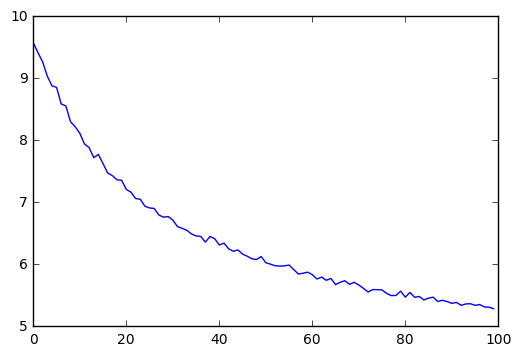

In [30]:
plt.plot(hist)

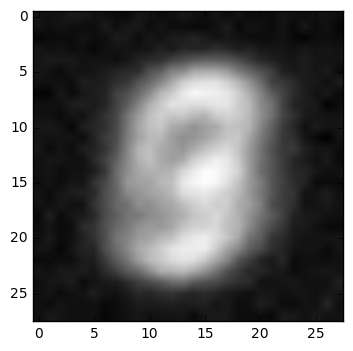

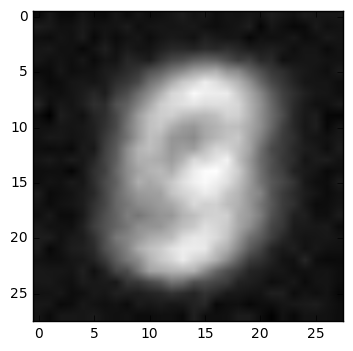

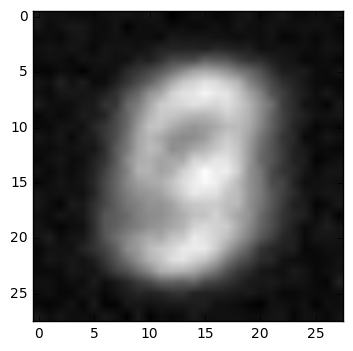

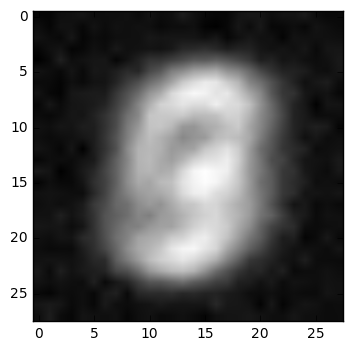

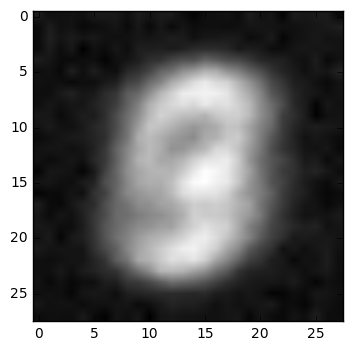

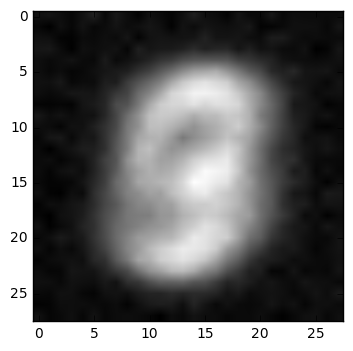

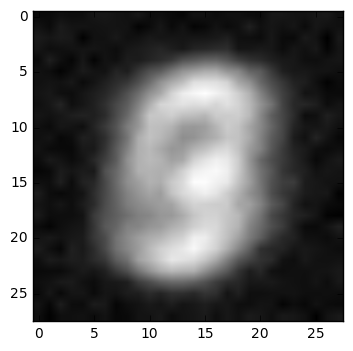

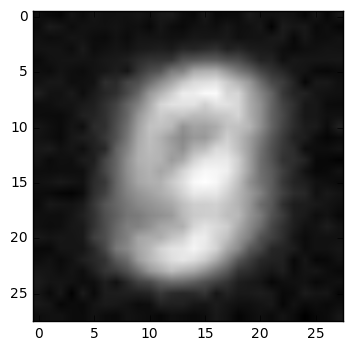

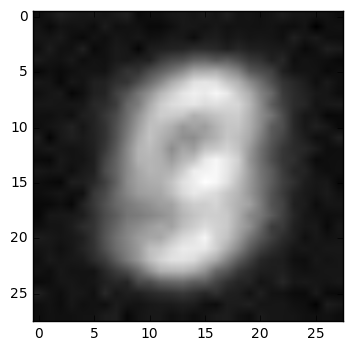

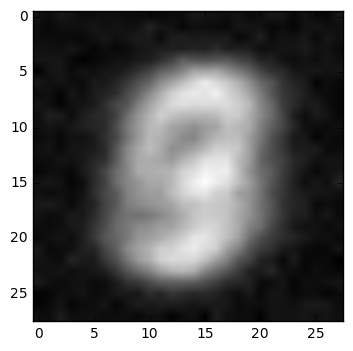

In [31]:
for i in range(10):
    a=W[i]
    a=np.reshape(a,(28,28))
    plt.imshow(a,cmap='gray')
    plt.show()